#Import Modules:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report

# Data collection:

In [ ]:
iris_data = pd.read_csv("Iris.csv")

In [ ]:
#retrives the entire rows and columns of a dataset
iris_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
iris_data.drop("Id",axis=1,inplace=True)

In [ ]:
#retrives the first 5 records of a dataset
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#retrives the last 5 records of dataset
iris_data.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
#describes about all columns along with all records their mean,min,max and etc.
iris_data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris_data['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [ ]:
#retrives the no of rows and columns of dataset
iris_data.shape

(150, 5)

In [ ]:
iris_data.sum()

SepalLengthCm                                                876.5
SepalWidthCm                                                 458.1
PetalLengthCm                                                563.8
PetalWidthCm                                                 179.8
Species          Iris-setosaIris-setosaIris-setosaIris-setosaIr...
dtype: object

# Data Visualization:

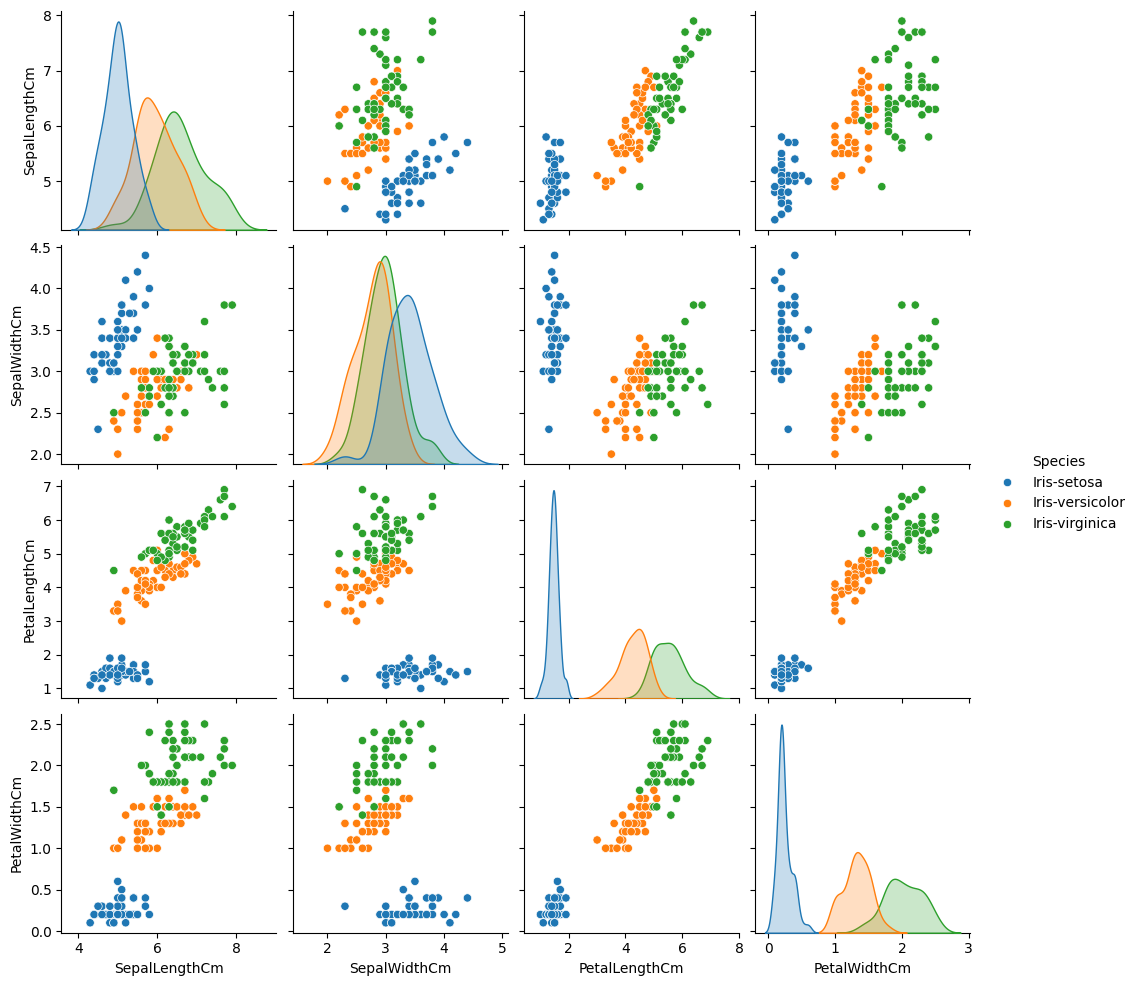

In [ ]:
sns.pairplot(iris_data,hue='Species')


<Axes: >

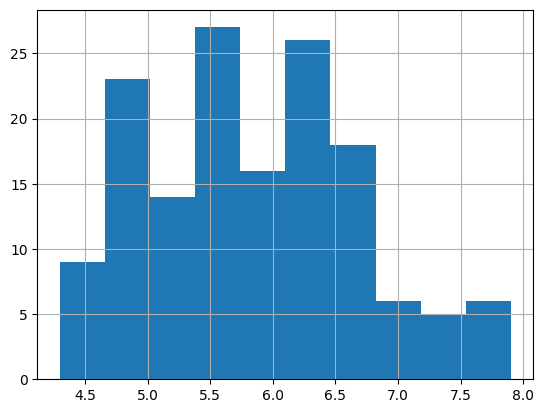

In [ ]:
#visualizing sepal lenth of every iris
iris_data['SepalLengthCm'].hist()

<Axes: >

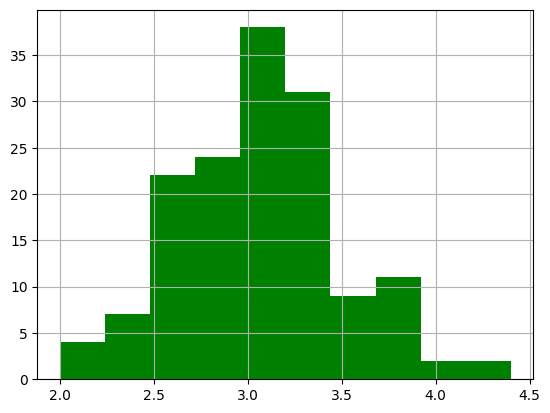

In [ ]:
iris_data['SepalWidthCm'].hist(color='green')

<Axes: >

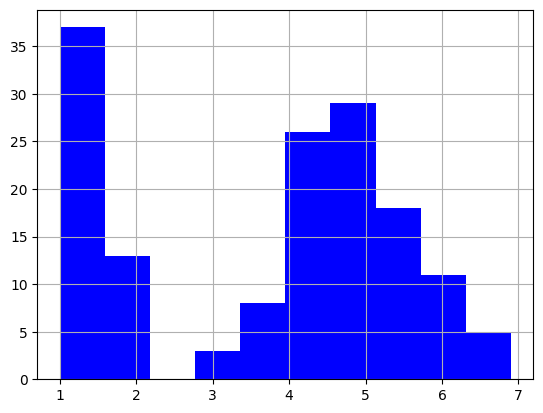

In [ ]:
iris_data['PetalLengthCm'].hist(color = 'blue')

<Axes: >

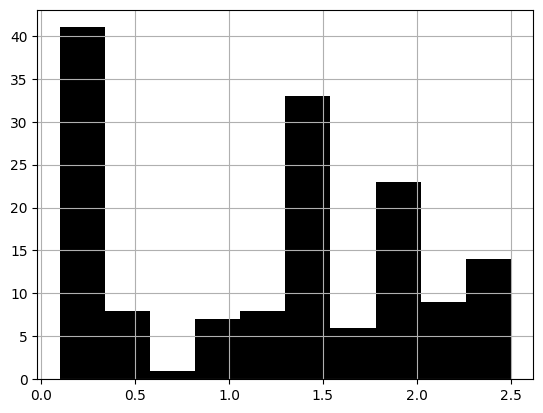

In [ ]:
iris_data['PetalWidthCm'].hist(color = 'black')

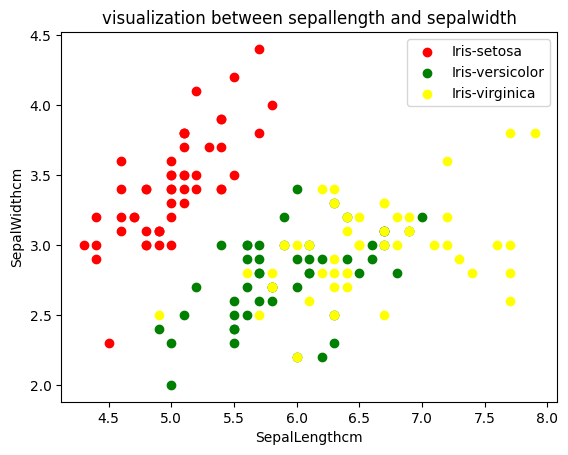

In [ ]:
color = ['red','green','yellow']
species = ['Iris-setosa','Iris-versicolor','Iris-virginica']

for i in range(3):
  data = iris_data[iris_data['Species'] == species[i]]
  j = species[i]%color
  plt.scatter(data['SepalLengthCm'],data['SepalWidthCm'], c = color[i],label=species[i])
plt.title('visualization between sepallength and sepalwidth')
plt.xlabel('SepalLengthcm')
plt.ylabel('SepalWidthcm')
plt.legend()
plt.show()

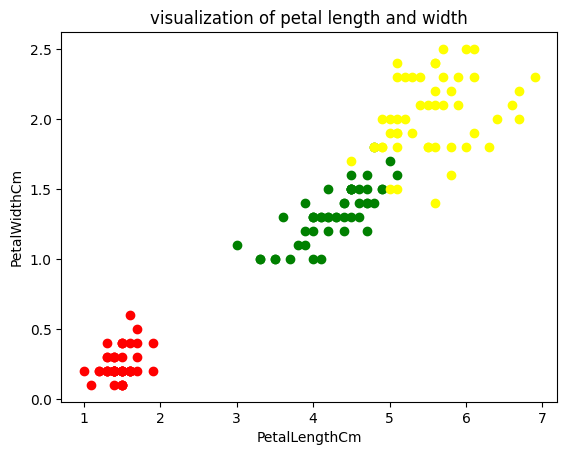

In [ ]:
for i in range(3):
  data = iris_data[iris_data['Species'] == species[i]]
  plt.scatter(data['PetalLengthCm'],data['PetalWidthCm'], c = color[i], label = species[i])
plt.title("visualization of petal length and width")
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.show()

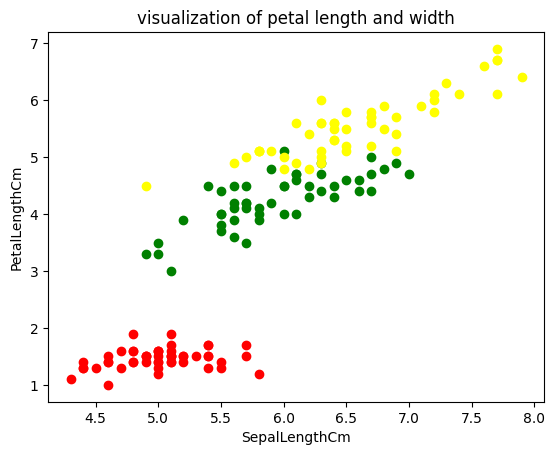

In [ ]:
for i in range(3):
  data = iris_data[iris_data['Species'] == species[i]]
  plt.scatter(data['SepalLengthCm'],data['PetalLengthCm'], c = color[i], label = species[i])
plt.title("visualization of petal length and width")
plt.xlabel('SepalLengthCm')
plt.ylabel('PetalLengthCm')
plt.show()

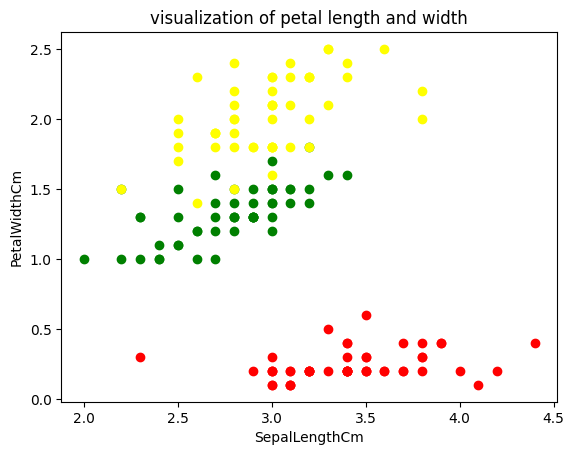

In [ ]:
for i in range(3):
  data = iris_data[iris_data['Species'] == species[i]]
  plt.scatter(data['SepalWidthCm'],data['PetalWidthCm'], c = color[i], label = species[i])
plt.title("visualization of petal length and width")
plt.xlabel('SepalLengthCm')
plt.ylabel('PetalWidthCm')
plt.show()

In [ ]:
#finding correlation between the data
iris_corr = iris_data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].corr()
iris_corr

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


heatmap = go.Heatmap(z=iris_corr.values,
                     x=iris_corr.columns,
                     y=iris_corr.columns,
                     colorscale= "electric" )
layout = go.Layout(title = "Correlation between Sepal and Petal Attributes")

fig = go.Figure(data=heatmap,layout=layout)
fig.show()

In [ ]:
heatmap = go.Heatmap(z=iris_corr.values,
                     x=iris_corr.columns,
                     y=iris_corr.columns,
                     colorscale= "electric" )
layout = go.Layout(title = "Correlation between Sepal and Petal Attributes")

fig = go.Figure(data=heatmap,layout=layout)
fig.show()

# Label Encoding:


In [ ]:
label = LabelEncoder()

In [ ]:
iris_data['Species'] = label.fit_transform(iris_data['Species'])

In [ ]:
iris_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Splitting data

In [ ]:
x = iris_data.drop(columns=['Species'])

In [ ]:
y = iris_data['Species']

In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [ ]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# Splitting of data into test and training sets:

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

In [ ]:
x_train.shape

(105, 4)

In [ ]:
x_test.shape

(45, 4)

# KNN Neighbours classifier:

In [ ]:
knn = KNeighborsClassifier(n_neighbors=9)

In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=9)

# Model Evaluation:

In [ ]:
y_train_predict = knn.predict(x_train)

In [ ]:
y_train_predict

array([1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1,
       2, 0, 1, 2, 0, 2, 2, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 2, 0, 2, 0, 0,
       2, 1, 2, 2, 2, 2, 1, 0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1,
       2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0,
       2, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 1, 1, 0, 1, 2])

In [ ]:
print("Accuracy:", accuracy_score(y_train,y_train_predict))


Accuracy: 0.9619047619047619


In [ ]:
print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.97      0.92      0.94        37
           2       0.92      0.97      0.95        37

    accuracy                           0.96       105
   macro avg       0.96      0.96      0.96       105
weighted avg       0.96      0.96      0.96       105



In [ ]:
y_test_predict = knn.predict(x_test)
y_test_predict

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [ ]:
print("Accuracy:", accuracy_score(y_test,y_test_predict))

Accuracy: 1.0


In [ ]:
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# Logistic Regression:

In [ ]:
ln = LogisticRegression()

In [ ]:
ln.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_train_pred = ln.predict(x_train)
y_train_pred

array([1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1,
       2, 0, 1, 2, 0, 2, 2, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 2, 0, 2, 0, 0,
       2, 1, 2, 2, 2, 2, 1, 0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1,
       2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0,
       2, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 1, 1, 0, 1, 2])

In [ ]:
print("accuracy score: ",accuracy_score(y_train,y_train_pred))

accuracy score:  0.9619047619047619


In [ ]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.97      0.92      0.94        37
           2       0.92      0.97      0.95        37

    accuracy                           0.96       105
   macro avg       0.96      0.96      0.96       105
weighted avg       0.96      0.96      0.96       105



In [ ]:
y_test_pred = ln.predict(x_test)
y_test_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [ ]:
print('accuracy score; ',accuracy_score(y_test,y_test_pred))

accuracy score;  1.0


In [ ]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# Prediction model:

In [ ]:
data = pd.DataFrame({
    "SepalLengthCm": [5.1],
    "SepalWidthCm": [3.5],
    "PetalLengthCm": [1.4],
    "PetalWidthCm": [0.2]
})

# Making predictions
prediction = knn.predict(data)

print(prediction)
if prediction == 0:
    print("The flower is Iris Setosa ")
elif prediction == 1:
    print("The flower is Iris Versicolor ")
else:
    print("The flower is Iris Virginica ")



[0]
The flower is Iris Setosa 
